# <center><font size=10, color="#7B242F"><u>Attribute Selection Measures Computation</u> </font>

### Introduction

   - This tutorial aims to teach you the steps of calculating classification meterics; mainly, the **entropy and Information gain**. This tutorial will walk you throught the steps of computing theses metrics, and how **decision tree algorithm** workflow process works.

In [1]:
##===========================================================
#     Importing the lesson tools 
##===========================================================

import pandas as pd; import numpy as np

In [2]:
df = pd.read_csv('inf_gain.csv')
df.head()

,State,Median_income,%_Bachelors_degree_or_higher,%_White,Political_Leaning,income,education,diversity
0,California,70489,0.33,0.37,0,1,1,1
1,Colorado,73034,0.39,0.68,0,1,1,1
2,Connecticut,72812,0.38,0.66,0,1,1,1
3,Delaware,65012,0.31,0.62,0,1,1,1
4,D.C.,85750,0.57,0.37,0,1,1,1


In [3]:
df.drop(['State','Median_income', '%_Bachelors_degree_or_higher', '%_White'], axis=1, 
             inplace=True)

In [4]:
df['Political_Leaning'].unique()

array([0, 2, 1])

In [5]:
df['Political_Leaning'] = df['Political_Leaning'].map({0:0, 1: 1, 2: 1})

In [6]:
df['Political_Leaning'].value_counts()

1    29
0    22
Name: Political_Leaning, dtype: int64

- The target variable is **Political_Leaning**

- We will compute the entropy metric
 
- We will go through each step of the formula and calculate the entropy for the **Political_Leaning** variable. Here are the steps of doing that:

    1. Iterate through each unique value in a single column and assign it to i. For this example, we have 2 cases either (0) or (1).
    
  2. Compute the probability of that value occurring in the data. 
  
  3. Take the probability of each case and multiply it by the logarithm base 2 of the probability. 

In [7]:
df.head()

,Political_Leaning,income,education,diversity
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,1,1,1


In [8]:
# The total number

n_samples = len(df)
n_samples

51

In [9]:
# The number of (1) or (yes) in the data
# ---------------------------------------
num_yes = df['Political_Leaning'][df['Political_Leaning']==1].sum()
num_yes

29

In [10]:
# The number of (0) or (no) in the data
# ---------------------------------------
num_no = n_samples - num_yes
num_no

22

In [11]:
# Calculate the probability for Yes and for No
# ---------------------------------------------
prob_yes = num_yes/n_samples
prob_no = num_no/n_samples
print(prob_yes)
print(prob_no)

0.5686274509803921
0.43137254901960786


In [12]:
# take the log base 2 of each probability
# ----------------------------------------
log_prob_yes = np.log2(prob_yes)
log_prob_no = np.log2(prob_no)
print(log_prob_yes)
print(log_prob_no)

-0.8144443468439235
-1.2129937233341983


In [13]:
# Multiply the probability for Yes and No by log base 2
# ----------------------------------------------------
prob_log_yes = log_prob_yes * prob_yes
prob_log_no = log_prob_no * prob_no
print(prob_log_yes)
print(prob_log_no)

-0.46311541291125063
-0.5232521943794581


In [14]:
# Sum the results
# -----------------
sum_everything = prob_log_no + prob_log_yes
print(sum_everything)

-0.9863676072907088


In [15]:
## Negate the result
# -------------------
final_res = - sum_everything
print(final_res)

0.9863676072907088


In [16]:
##==========================================================
#        All the steps together
##==========================================================

entropy = -1*((29/51)* np.log2(29/51) + (22/51)* np.log2(22/51))
print(entropy)

0.9863676072907088


In [17]:
# We can this function to compute the entropy
# ===========================================
from scipy.stats import entropy
entropy([(29/51), (22/51)], base=2)

0.9863676072907089

In [18]:
entropy([(7/15), (2/15)], base=2)

0.7642045065086203

**Our final entropy is 0.986 So, what does that really mean?**

- We get less than one **bit** of information — only `0.986`, this because there are more (1)s in the **target** column than (0)s. This means that if we were predicting a new value, we could guess that the answer is (1) and be right more often than wrong (the probability of **yes** is 0.56) which is greater than the probability of **no**. 

**Definition of Bit of Information**

>> In information theory, a bit is thought of as a binary number representing 0 for no information and 1 for a full bit of information. We can represent a bit of information as a binary number because it either has the value (1) or (0). 



- In the next section we will split the **Political Leaning** variable on the income variable and compute the **entropy** after the left side subset and on the right side subset.**



### Splitting on  Income Variable

In [19]:
df_income_1 = df[df['income']==1]
df_income_1

,Political_Leaning,income,education,diversity
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,1,1,1
5,0,1,1,1
6,0,1,1,1
8,0,1,1,1
9,0,1,1,0
11,0,1,1,0


In [20]:
df_income_0 = df[df['income']==0]
df_income_0

,Political_Leaning,income,education,diversity
7,0,0,0,0
10,0,0,0,0
12,0,0,0,1
15,0,0,0,1
18,0,0,1,0
24,1,0,0,1
26,1,0,0,1
27,1,0,0,0
28,1,0,0,1
29,1,0,0,1


In [21]:
# Compute the entropy after splitting (left side)
# ===================================
df[['Political_Leaning', 'income']][df['income']==1].sum()

Political_Leaning     8
income               25
dtype: int64

In [22]:
# The entropy on the left side
# ============================
entropy_left = -1* ((8/25)* np.log2(8/25) + (17/25)* np.log2(17/25))
entropy_left

0.9043814577244937

In [23]:
# Check with the function entropy from scipy
# ==========================================
print(entropy([(8/51), (17/51)], base=2))
print(entropy([(8/25), (17/25)], base=2))

0.9043814577244941
0.9043814577244939


In [24]:
# Compute the entropy after splitting (right side)
# ===================================
df[['Political_Leaning', 'income']][df['income']==0].value_counts()

Political_Leaning  income
1                  0         21
0                  0          5
dtype: int64

In [25]:
# The entropy on the righ side
# ============================
entropy_right = -1*((21/26)* np.log2(21/26) + (5/26)* np.log2(5/26))
entropy_right

0.7062740891876007

In [26]:
entropy([(21/51), (5/51)], base=2)

0.7062740891876007

It is tedious to do the calculation by hand, thus we write a function to do the calculations for us. we call it `cal_entropy()`

In [27]:
import pandas as pd
import numpy as np
import math


def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [28]:
# Calcalate the entropy for the left side of after splitting on income
# ====================================================================
calc_entropy(df_income_1['Political_Leaning'])

0.904381457724494

In [29]:
calc_entropy(df_income_0['Political_Leaning'])

0.7062740891876007

- The entropy has been gown down. That is good. But, which variable that can give the lowest  entropy possible. We try to split on the other variables one by one to pick the best variable to split on the root node.

In [30]:
df_education_1 = df[df['education']==1]
df_education_0 = df[df['education']==0]

df_diversity_1 = df[df['diversity']==1]
df_diversity_0 = df[df['diversity']==0]

In [31]:
# Calculate the entropy for each variable
# ======================================
print("Education_1: ", calc_entropy(df_education_1['Political_Leaning']))
print("Education_0: ", calc_entropy(df_education_0['Political_Leaning']))
print("-" * 32)
print("Diversity_1: ",calc_entropy(df_diversity_1['Political_Leaning']))
print("Diversity_0: ",calc_entropy(df_diversity_0['Political_Leaning']))
print("-" * 32)

print("Income_1: ",calc_entropy(df_income_1['Political_Leaning']))
print("Income_0: ",calc_entropy(df_income_0['Political_Leaning']))
print("-" * 32)

Education_1:  0.6840384356390417
Education_0:  0.5787946246321198
--------------------------------
Diversity_1:  0.9895875212220557
Diversity_0:  0.8904916402194913
--------------------------------
Income_1:  0.904381457724494
Income_0:  0.7062740891876007
--------------------------------


- We see that the variable **education** is the one which lowers the entropy the most from `0.986` to `0.57` and `0,68`. Which makes it the candidate variable to start splitting the data on. In other words, it is the variable to split on the root node.

- The entropy is used to compute the **information gain**, but instead, we aim to maximize this **metric**. 

- we write a function to compute the **information gain** to confirm that **education** is the first variable to split on. 

**The information gain formula**,

### $$\textbf{IG}(T, A) = \textbf{Entropy(T)} - \sum_{v \in A}\frac{|T_{v}|}{T} \textbf{Entropy}(T_{v}) $$

- In order to find the best variable to split on, you need to **maximize** the **information gain**. To maximize the information gain, the entropy must go down, because the **IG** relies on this value, so if the result is positive, you've lowered entropy with your split. Here are the steps of calculating the information gain:

 1. Calculate entropy before splitting (we did and it was `0.986`)
 2. Calculate entropy on both sides (we did that for income variable: left = `0.904`, right = `0.706`) (see the results above for other variables)
 3. Multiply:
     - The number of samples on the left side by the `entropy` of the left (`25/51` * `0.904` = `0.443`)
     - The number of samples on the right side by the `entropy` of the right (`26/51` * `0.706` = `0.359`)
     - Add the results of both sides (`0.443` + `0.359` = `0.803`)
 4. Subtract the result from the original entropy (left: `0.986 - 0.803 = 0.182`)
 
**What does this result mean?**,

 - It means we gained a `0.182` bit of information by splitting on the `income` variable.
 
**Note**:

 - We shouldn't stop here, but we have to try to split on **every column** then we compare the results. The variable that **maximizes** the **information gain** would be the one to split the data on. 
 
In the next section we write a function to try splitting on each variable to see which variable is the best one to start splitting on.
 

In [32]:
# The left side calculation
# ------------------------
left = (25/51) * 0.904

print("The left result is:", left)

# The right side calculation
# ------------------------
right = (26/51)*  0.706

print("The right result is:" , right)

# The sum of both sides
# --------------------
print("The sum of both sides is: ", left + right)

# The information gain
# ----------------------
print("The Information Gain result is: ", 0.986 - (left + right))

The left result is: 0.44313725490196076
The right result is: 0.35992156862745095
The sum of both sides is:  0.8030588235294117
The Information Gain result is:  0.18294117647058827


## Information Gain

  - Here we write a function to do the calculations for us for each variable. 

In [33]:
## ==============================================================
#           Calculating the information gain
#  ==============================================================

def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [34]:
# Calculate the IG for each variable using the previously written functions
# -------------------------------------------------------------------------

columns = ['income', 'education', 'diversity']

for col in columns:
    (print("The IG for the attribute {} is {:0.4f}" 
          .format(col, calc_information_gain(df, col, 'Political_Leaning'))))

The IG for the attribute income is 0.1830
The IG for the attribute education is 0.3622
The IG for the attribute diversity is 0.0473


## What is the highest maximum gain?

  - We aim to maximize the iformation gain to pick the best variable. The next function we give us the answer.

In [35]:
columns = ['income', 'education', 'diversity']

def highest_info_gain(columns):
    
     #Intialize an empty dictionary for information gains
    information_gains = {}
    
    
    #Iterate through each column name in our list
    for col in columns:
        
        #Find the information gain for the column
        information_gain = calc_information_gain(df, col, 'Political_Leaning')
        
        # If you want to print the information gain for each attribute
        #print(information_gain)
        
        #Add the information gain to our dictionary using the column name as the ekey                                         
        information_gains[col] = information_gain
        
        #Return the key with the highest value
    return max(information_gains, key = information_gains.get)                                           
                                             

In [36]:
# What variable maximizes the IG the most
# ==========================================
columns = ['income', 'education', 'diversity']
print("The variable that maximizes the IG is: ", highest_info_gain(columns))

The variable that maximizes the IG is:  education


## Using sklearn to confirm the results  


  - Here we will use sklearn to confirm our results.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree
import matplotlib.pyplot as plt

X = df[['income', 'education', 'diversity']]
y = df['Political_Leaning']

In [38]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy', 
                            random_state=10)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

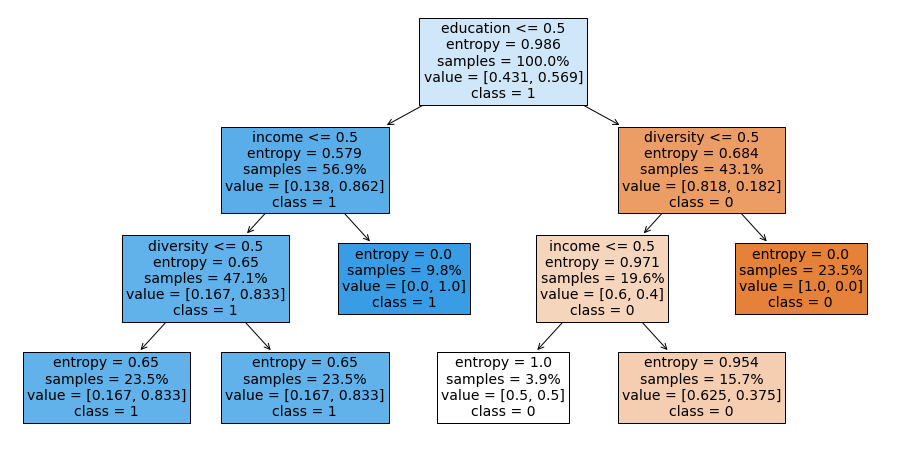

In [39]:
plt.figure(figsize=(16, 8))
_ = plot_tree(dt, filled=True,
                   feature_names = columns,
                   fontsize=14, 
                   proportion=True,
                   class_names=['0','1'])

**Our results are confirmed** !!!👊👊👊👊👊

references

1. https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php


2. https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8


3. https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293